In [1]:
import pandas as pd

times = pd.read_csv("timesData.csv")
cwur = pd.read_csv("cwurData.csv")

In [2]:
times.head()


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [3]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
times.shape

(2603, 14)

In [5]:
times.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [6]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [7]:
times.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [8]:
times['num_students'] = times['num_students'].str.replace(',', '')
times['num_students'] = pd.to_numeric(times['num_students'], errors='coerce')

times['international_students'] = times['international_students'].str.replace('%','')
times['international_students'] = pd.to_numeric(times['international_students'], errors='coerce')

times['income'] = pd.to_numeric(times['income'], errors='coerce')
times['total_score'] = pd.to_numeric(times['total_score'], errors='coerce')


In [9]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memor

In [10]:
times.isnull().sum()

world_rank                   0
university_name              0
country                      0
teaching                     0
international                0
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
female_male_ratio          233
year                         0
dtype: int64

In [11]:
times['income'].fillna(times['income'].median(), inplace=True)
times['num_students'].fillna(times['num_students'].median(), inplace=True)
times['student_staff_ratio'].fillna(times['student_staff_ratio'].median(), inplace=True)
times['international_students'].fillna(times['international_students'].median(), inplace=True)


C:\Users\amits\AppData\Local\Temp\ipykernel_3860\720953374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  times['income'].fillna(times['income'].median(), inplace=True)
C:\Users\amits\AppData\Local\Temp\ipykernel_3860\720953374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [12]:
times.isnull().sum()

world_rank                   0
university_name              0
country                      0
teaching                     0
international                0
research                     0
citations                    0
income                       0
total_score               1402
num_students                 0
student_staff_ratio          0
international_students       0
female_male_ratio          233
year                         0
dtype: int64

In [13]:
times = times.dropna(subset=['total_score'])


In [14]:
times.isnull().sum()


world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio         123
year                        0
dtype: int64

In [15]:
times['world_rank'] = times['world_rank'].str.replace('=','')
times['world_rank'] = times['world_rank'].str.split('-').str[0]
times['world_rank'] = pd.to_numeric(times['world_rank'], errors='coerce')


In [16]:
times['world_rank'].head()



0    1
1    2
2    3
3    4
4    5
Name: world_rank, dtype: int64

In [17]:
times['world_rank'].dtype

dtype('int64')

In [18]:
times.sort_values('world_rank').head(10)[['world_rank','university_name','country','total_score']]


,world_rank,university_name,country,total_score
0,1,Harvard University,United States of America,96.1
1002,1,California Institute of Technology,United States of America,94.9
602,1,California Institute of Technology,United States of America,95.5
1402,1,California Institute of Technology,United States of America,94.3
1803,1,California Institute of Technology,United States of America,95.2
200,1,California Institute of Technology,United States of America,94.8
1004,2,University of Oxford,United Kingdom,93.9
603,2,Stanford University,United States of America,93.7
604,2,University of Oxford,United Kingdom,93.7
202,2,Stanford University,United States of America,93.9


In [19]:
times.duplicated().sum()


np.int64(0)

In [20]:
times[['world_rank','university_name','year']].sort_values('world_rank').head(10)


,world_rank,university_name,year
0,1,Harvard University,2011
1002,1,California Institute of Technology,2014
602,1,California Institute of Technology,2013
1402,1,California Institute of Technology,2015
1803,1,California Institute of Technology,2016
200,1,California Institute of Technology,2012
1004,2,University of Oxford,2014
603,2,Stanford University,2013
604,2,University of Oxford,2013
202,2,Stanford University,2012


In [21]:
latest = times[times['year'] == 2016]
latest.sort_values('world_rank').head(10)[['world_rank','university_name','country','total_score']]


,world_rank,university_name,country,total_score
1803,1,California Institute of Technology,United States of America,95.2
1804,2,University of Oxford,United Kingdom,94.2
1805,3,Stanford University,United States of America,93.9
1806,4,University of Cambridge,United Kingdom,92.8
1807,5,Massachusetts Institute of Technology,United States of America,92.0
1808,6,Harvard University,United States of America,91.6
1809,7,Princeton University,United States of America,90.1
1810,8,Imperial College London,United Kingdom,89.1
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,88.3
1812,10,University of Chicago,United States of America,87.9


In [22]:
latest['country'].value_counts().head(10)


country
United States of America    63
United Kingdom              34
Germany                     20
Netherlands                 12
Australia                    8
Canada                       7
Switzerland                  7
Sweden                       6
France                       5
South Korea                  4
Name: count, dtype: int64

In [23]:
latest.groupby('country')['total_score'].mean().sort_values(ascending=False).head(10)


country
Singapore                   73.700000
China                       71.000000
United States of America    67.431746
Japan                       65.500000
Canada                      64.657143
Australia                   64.237500
Hong Kong                   64.233333
Switzerland                 63.642857
United Kingdom              62.020588
Finland                     61.900000
Name: total_score, dtype: float64

In [24]:
latest[['world_rank','teaching','research','citations','income','international','total_score']].corr()


,world_rank,teaching,research,citations,income,international,total_score
world_rank,1.000000,-0.847000,-0.889583,-0.406523,-0.216194,-0.120428,-0.936814
teaching,-0.847000,1.000000,0.894834,0.186377,0.194740,-0.043388,0.909918
research,-0.889583,0.894834,1.000000,0.150736,0.256614,0.057884,0.923236
citations,-0.406523,0.186377,0.150736,1.000000,-0.217523,0.063861,0.466585
income,-0.216194,0.194740,0.256614,-0.217523,1.000000,-0.060919,0.177012
international,-0.120428,-0.043388,0.057884,0.063861,-0.060919,1.000000,0.151108
total_score,-0.936814,0.909918,0.923236,0.466585,0.177012,0.151108,1.000000


In [25]:
latest[['teaching','research','citations','income','international','total_score']].describe()


,teaching,research,citations,income,total_score
count,200.00000,200.000000,200.00000,200.000000,200.000000
mean,50.25000,53.905500,82.91500,55.742500,62.520000
std,16.28864,19.765154,12.79835,22.980312,12.040555
min,25.00000,18.100000,8.60000,28.000000,48.800000
25%,38.50000,39.000000,76.67500,36.775000,52.900000
50%,47.40000,48.650000,84.70000,48.250000,57.950000
75%,59.95000,69.375000,92.20000,72.400000,69.625000
max,95.60000,99.000000,100.00000,100.000000,95.200000


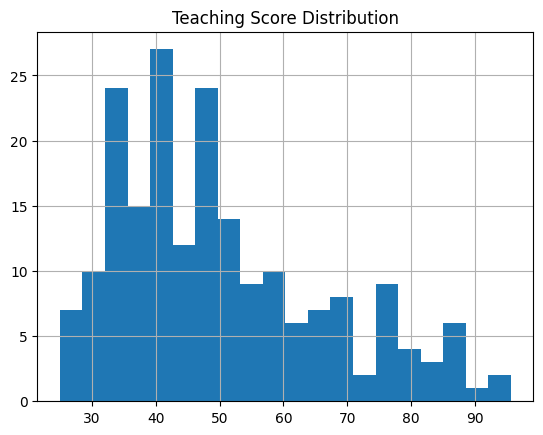

In [26]:
import matplotlib.pyplot as plt

latest['teaching'].hist(bins=20)
plt.title('Teaching Score Distribution')
plt.show()


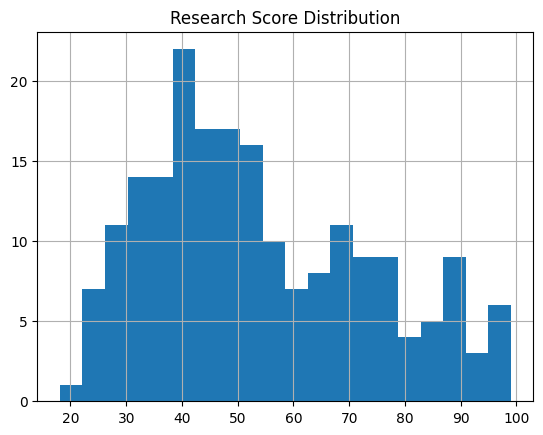

In [48]:
latest['research'].hist(bins=20)
plt.title('Research Score Distribution')
plt.show()


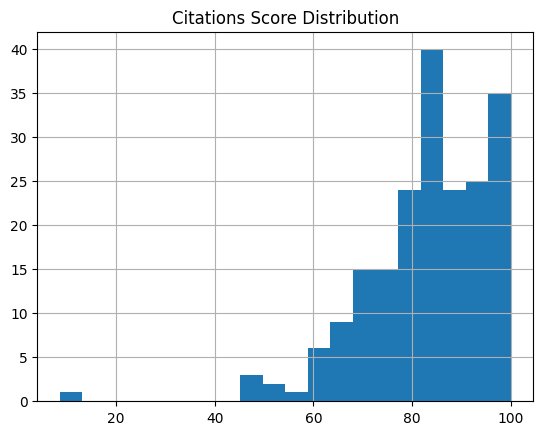

In [49]:
latest['citations'].hist(bins=20)
plt.title('Citations Score Distribution')
plt.show()


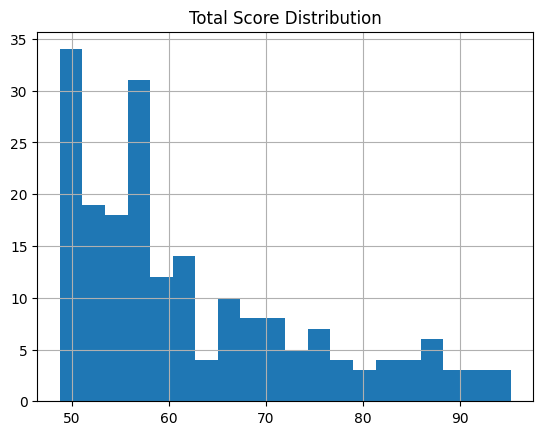

In [50]:
latest['total_score'].hist(bins=20)
plt.title('Total Score Distribution')
plt.show()



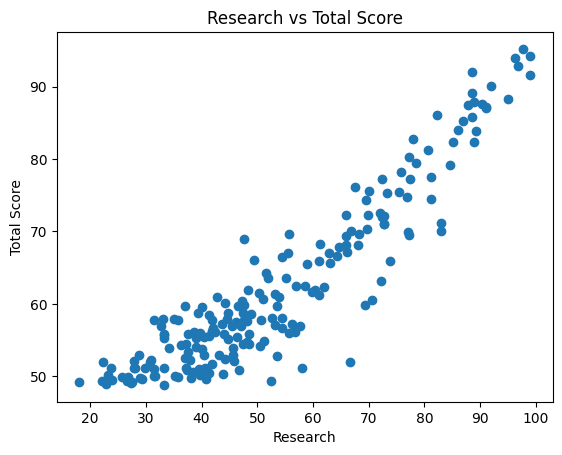

In [51]:
plt.scatter(latest['research'], latest['total_score'])
plt.xlabel('Research')
plt.ylabel('Total Score')
plt.title('Research vs Total Score')
plt.show()


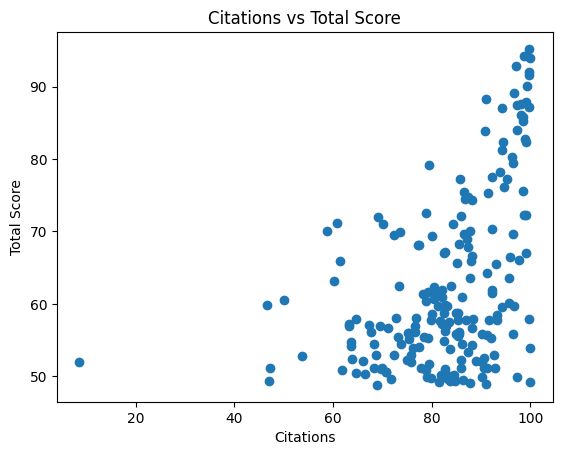

In [52]:
plt.scatter(latest['citations'], latest['total_score'])
plt.xlabel('Citations')
plt.ylabel('Total Score')
plt.title('Citations vs Total Score')
plt.show()


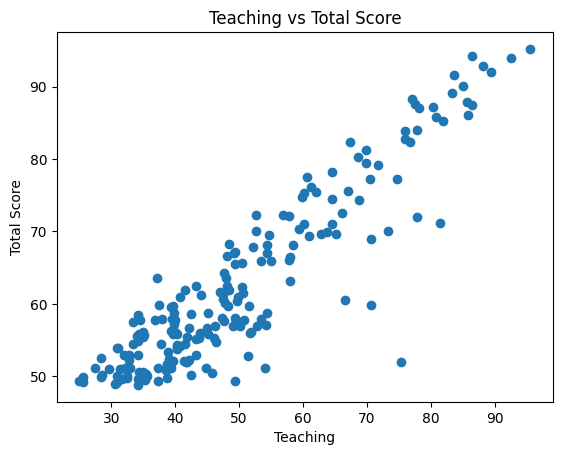

In [53]:
plt.scatter(latest['teaching'], latest['total_score'])
plt.xlabel('Teaching')
plt.ylabel('Total Score')
plt.title('Teaching vs Total Score')
plt.show()


In [54]:
corr = latest[['teaching','research','citations','income','international','total_score']].corr()
corr['total_score'].sort_values(ascending=False)


total_score      1.000000
research         0.923236
teaching         0.909918
citations        0.466585
income           0.177012
international    0.151108
Name: total_score, dtype: float64

In [55]:
times.groupby('year')['total_score'].mean()


year
2011    60.429500
2012    57.881500
2013    61.576000
2014    57.733500
2015    58.940796
2016    62.520000
Name: total_score, dtype: float64

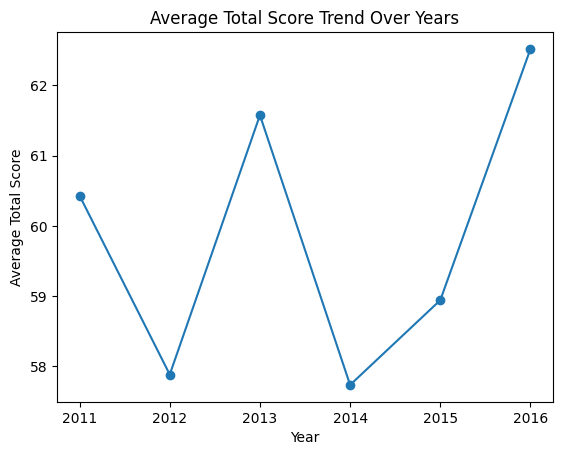

In [34]:
times.groupby('year')['total_score'].mean().plot(marker='o')
plt.title('Average Total Score Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
plt.show()


In [ ]:
country_stats = (
    times.groupby('country')['total_score']
    .agg(['count','mean','median','std'])
    .sort_values('mean', ascending=False)
)

country_stats.head(10)

,count,mean,median,std
country,,,,
Singapore,12,65.600000,69.55,11.040092
United States of America,437,64.508009,60.70,14.912685
China,18,61.338889,65.05,9.326379
Switzerland,41,61.024390,56.10,12.173183
Canada,48,60.981250,56.15,12.666351
Hong Kong,22,60.213636,62.10,10.304890
Australia,45,60.120000,60.70,8.955257
Japan,27,59.474074,53.70,10.180471
United Kingdom,186,58.994086,53.85,13.780500


In [ ]:
Q1 = latest['total_score'].quantile(0.25)
Q3 = latest['total_score'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = latest[(latest['total_score'] < lower) | (latest['total_score'] > upper)]
outliers[['university_name','country','total_score']].head(10)

,university_name,country,total_score
1803,California Institute of Technology,United States of America,95.2


In [59]:
times.groupby('country')['total_score'].mean().sort_values(ascending=False).head(5)


country
Singapore                   65.600000
United States of America    64.508009
China                       61.338889
Switzerland                 61.024390
Canada                      60.981250
Name: total_score, dtype: float64

In [60]:
times.sort_values('total_score', ascending=False)[['university_name','country','year','total_score']].head(5)


,university_name,country,year,total_score
0,Harvard University,United States of America,2011,96.1
1,California Institute of Technology,United States of America,2011,96.0
2,Massachusetts Institute of Technology,United States of America,2011,95.6
602,California Institute of Technology,United States of America,2013,95.5
1803,California Institute of Technology,United States of America,2016,95.2


In [61]:
corr['total_score'].sort_values(ascending=False)


total_score      1.000000
research         0.923236
teaching         0.909918
citations        0.466585
income           0.177012
international    0.151108
Name: total_score, dtype: float64

In [35]:
times.to_csv("cleaned_timesData.csv", index=False)


In [36]:
cwur.head()



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [37]:
cwur.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [38]:
cwur.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [39]:
cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [40]:
cwur = cwur.drop_duplicates()


In [41]:
cwur.duplicated().sum()


np.int64(0)

In [42]:
cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [43]:
cwur['broad_impact'].fillna(cwur['broad_impact'].median(), inplace=True)


C:\Users\amits\AppData\Local\Temp\ipykernel_3860\1073283655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cwur['broad_impact'].fillna(cwur['broad_impact'].median(), inplace=True)


In [44]:
cwur.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [45]:
cwur['country'].value_counts().head(10)


country
USA               573
China             167
Japan             159
United Kingdom    144
Germany           115
France            109
Italy              96
Spain              81
Canada             72
South Korea        72
Name: count, dtype: int64

In [46]:
latest['country'].value_counts().head(10)


country
United States of America    63
United Kingdom              34
Germany                     20
Netherlands                 12
Australia                    8
Canada                       7
Switzerland                  7
Sweden                       6
France                       5
South Korea                  4
Name: count, dtype: int64

In Times 2016 data, United States of America has the highest number of ranked universities (63), followed by UK and Germany.

In CWUR data, USA also has the highest presence (573 universities), followed by China, Japan, and UK.

USA clearly dominates in both ranking systems.

UK and Germany consistently appear in top countries in both datasets.

This shows strong global concentration of top universities in a few developed countries.